______________________________________________________________________________
Hodnoty vah na zaciatku W1 (umiestnene pred skrytou vrstvou)
[[-1.09428836 -0.55979989 -1.15218559  1.29673428]
 [ 0.47577083  0.22371179  0.0997644  -1.33103333]
 [-0.01352104  0.57062361  0.49009115 -0.95925789]]
Hodnoty vah na zaciatku W2 (umiestnene za skrytou vrstvou, pred vystupom)
[[-2.15704297]
 [ 0.64232479]
 [ 0.54457129]
 [ 0.52815667]]
______________________________________________________________________________
______________________________________________________________________________
Hodnoty vah na konci W1 (umiestnene pred skrytou vrstvou)
[[-0.73027461 -1.05530292 -1.22001298  1.18096429]
 [ 0.82016514 -0.27257099  0.03260996 -1.4461455 ]
 [ 0.17233779  0.26609596  0.44944207 -1.02909798]]
Hodnoty vah na konci W2 (umiestnene za skrytou vrstvou, pred vystupom)
[[-1.70172838]
 [ 0.24493456]
 [ 0.50969467]
 [ 0.46612857]]
_____________________________________________________________________

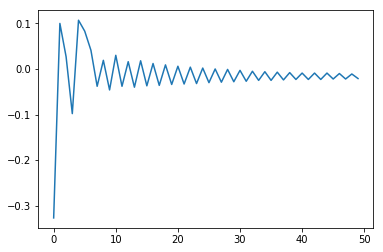

In [9]:
#importovanie kniznice numpy
import numpy as np

#importovanie kniznice matplotlib
import matplotlib.pyplot as plt

#importovanie kniznice Pandas
import pandas as pd


#nacitanie datasetu
csv = pd.read_csv('diamonds.csv')

#_______________________________________________________________trenovacie data
#info o diamantoch x, y, z
X = csv.iloc[0:10, [8, 9, 10]].values  #matica 3 x pocet riadkov

#pocet karatov
y = csv.iloc[0:10, [1]].values

#________________________________________________________________

#______________________testovacie data pre odhad karatov
xPredicted = csv.iloc[0:10, [8, 9, 10]].values
#_______________________________________________________
 

class Neural_Network(object):
    def __init__(self):
      #nastavenie poctu vstupov, vystupov a skrytych vrstiev
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 4

      #inicializacia vah nahodnymi cislami
        
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (4stlpce x 3riadky) váha matíc z počtu skrytých vrstiev a počtu vstupov 
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (4x1) váha matíc z počtu skrytých vrstiev a počtu výstupov 
        print("______________________________________________________________________________")
        print("Hodnoty vah na zaciatku W1 (umiestnene pred skrytou vrstvou)")
        print(self.W1)
        print("Hodnoty vah na zaciatku W2 (umiestnene za skrytou vrstvou, pred vystupom)")
        print(self.W2)
        print("______________________________________________________________________________")
    def forward(self, X):   # prechadzanie neuronovou sietou smerom dopredu

        self.z = np.dot(X, self.W1) # dot produkt(vynasobenie matic) z X (vstup x pocet riadkov) a prvý set váh 4x3
        self.z2 = self.sigmoid(self.z) # aktivačná funkcia z predosleho vysledku -> umiestni vstup medzi 0..1

        self.z3 = np.dot(self.z2, self.W2) # dot produkt(vynasobenie matic) zo skrytej vrstvy (z2) a vah W2 -- 3x1 
        o = self.sigmoid(self.z3) # finalna aktivacna funkcia z predosleho vysledku -> umiestni vstup medzi 0..1

        o = np.round(o, 3) # zaokruhlenie na tri desatinne miesta
        return o

    # aktivacna funkcia sigmoid
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

    #derivácia sigmoid
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, o):  # metoda ktora nam upravuje vahy tak aby smerovali k spravnemu predikovaniu
       
        self.o_error = y - o # chybovost -> hodnoty ktore ma odhadnut odcitame od tych ktore zatial odhadol  
        self.o_delta = self.o_error*self.sigmoidPrime(o) # ziskame hodnoty o kolko je potrebne upravit druhe vahy W2

        self.z2_error = self.o_delta.dot(self.W2.T)    # zistime ako vela prispeli W2 k chybe
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # ziskame hodnoty o kolko je potrebne upravit prve vahy W1

        self.W1 += X.T.dot(self.z2_delta) #uprava prvych vah
        self.W2 += self.z2.T.dot(self.o_delta) #uprava druhych vah

    def train(self, X, y):
        o = self.forward(X)   #odhadne hodnoty
        self.backward(X, y, o)  #upravuje vahy teda uci sa



    def predict(self):
        print("Odhadované dáta na základe trénovaných váh: ");
      #  print("Input (scaled): \n" + str(xPredicted));
        print("Výstup(po naučení): \n" + str(self.forward(xPredicted)));
        print("Malo byť (originálne dáta) \n" + str(y))


NN = Neural_Network()

errors = []
for i in range(50): # trenovanie nasej neuronovej siete
    NN.train(X, y)
    errors.append(NN.o_error[0])  # pridavame si do pola aka bola chybovost v danej iteracii

print("______________________________________________________________________________")
print("Hodnoty vah na konci W1 (umiestnene pred skrytou vrstvou)")
print(NN.W1)
print("Hodnoty vah na konci W2 (umiestnene za skrytou vrstvou, pred vystupom)")
print(NN.W2)
print("______________________________________________________________________________")
NN.predict()
plt.plot(errors)
print("______________________________________________________________________________")
print("originalne data - odhad ---> Pocas ucenia")
plt.show()
